# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [195]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [196]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/tobigs/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [197]:
data.shape

(6019, 14)

In [198]:
data.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [199]:
data.drop(['New_Price'],axis=1,inplace=True)

In [200]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [202]:
# 'Name' 열에서 첫 번째 띄어쓰기를 기준으로 브랜드와 모델을 나누어 새로운 열 생성
data[['Brand', 'Model']] = data['Name'].str.split(n=1, expand=True)

print(data[['Name', 'Brand', 'Model']].head())

                               Name    Brand                       Model
0            Maruti Wagon R LXI CNG   Maruti             Wagon R LXI CNG
1  Hyundai Creta 1.6 CRDi SX Option  Hyundai    Creta 1.6 CRDi SX Option
2                      Honda Jazz V    Honda                      Jazz V
3                 Maruti Ertiga VDI   Maruti                  Ertiga VDI
4   Audi A4 New 2.0 TDI Multitronic     Audi  A4 New 2.0 TDI Multitronic


In [203]:
import re

# 'Mileage' 열에서 숫자만 추출하여 새로운 열 생성
data['Mileage'] = data['Mileage'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else None)

# 'Engine' 열에서 숫자만 추출하여 새로운 열 생성
data['Engine'] = data['Engine'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else None)

# 'Power' 열에서 숫자만 추출하여 새로운 열 생성
data['Power'] = data['Power'].apply(lambda x: float(re.findall(r'\d+\.\d+', str(x))[0]) if re.findall(r'\d+\.\d+', str(x)) else None)

In [204]:
print(data.dtypes)

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object


In [205]:
# 첫 번째 결측치 제거 방법 - 평균으로 대체

data['Engine'].fillna(data['Engine'].mean(), inplace=True)

data['Power'].fillna(data['Power'].mean(), inplace=True)

data['Mileage'].fillna(data['Power'].mean(), inplace=True)

data['Seats'].fillna(data['Seats'].mean(), inplace=True)

In [206]:
data.isna().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [207]:
data1 = data.drop(['Unnamed: 0','Name', 'Model'], axis=1)
data1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [209]:
# 각 범주의 수
location_categories = len(data1['Location'].unique())

fuel_type_categories = len(data1['Fuel_Type'].unique())

transmission_categories = len(data1['Transmission'].unique())

owner_type_categories = len(data1['Owner_Type'].unique())

brand_categories = len(data1['Brand'].unique())

print(location_categories, fuel_type_categories, transmission_categories, owner_type_categories, brand_categories)

11 5 2 4 31


In [211]:
# 범주 수를 기준으로 원핫인코딩, 레이블 인코딩 적용

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encoding_columns = ['Location', 'Brand']

onehot_encoding_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

label_encoder = LabelEncoder()
for col in label_encoding_columns:
    data1[col] = label_encoder.fit_transform(data1[col])

onehot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = onehot_encoder.fit_transform(data[onehot_encoding_columns])

encoded_df = pd.concat([data1[label_encoding_columns], pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(onehot_encoding_columns))], axis=1)

encoded_df.head()

,Location,Brand,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,9,18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10,10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,9,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [212]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Location                   6019 non-null   int64  
 1   Brand                      6019 non-null   int64  
 2   Fuel_Type_Diesel           6019 non-null   float64
 3   Fuel_Type_Electric         6019 non-null   float64
 4   Fuel_Type_LPG              6019 non-null   float64
 5   Fuel_Type_Petrol           6019 non-null   float64
 6   Transmission_Manual        6019 non-null   float64
 7   Owner_Type_Fourth & Above  6019 non-null   float64
 8   Owner_Type_Second          6019 non-null   float64
 9   Owner_Type_Third           6019 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 470.4 KB


In [215]:
encoded_part = encoded_df.iloc[:, 2:]

# data1과 encoded_part를 옆으로 붙이기
merged_df = pd.concat([data1, encoded_part], axis=1)
merged_df.drop(['Fuel_Type'],axis=1,inplace=True)
merged_df.drop(['Transmission'],axis=1,inplace=True)
merged_df.drop(['Owner_Type'],axis=1,inplace=True)
merged_df.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,9,2010,72000,26.60,998.0,58.16,5.0,1.75,18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10,2015,41000,19.67,1582.0,126.20,5.0,12.50,10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2011,46000,18.20,1199.0,88.70,5.0,4.50,9,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2,2012,87000,20.77,1248.0,88.76,7.0,6.00,18,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


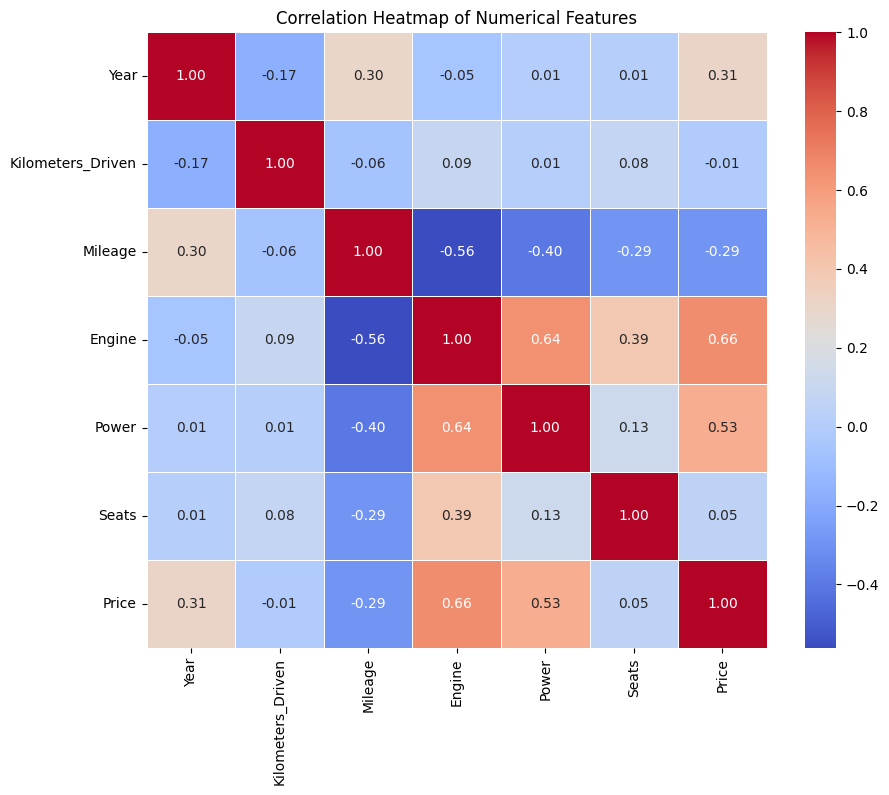

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수들로 이루어진 데이터프레임
numerical_data = data1[['Year', 'Kilometers_Driven', 'Mileage',	'Engine',	'Power', 'Seats', 'Price']]

numerical_correlation = numerical_data.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

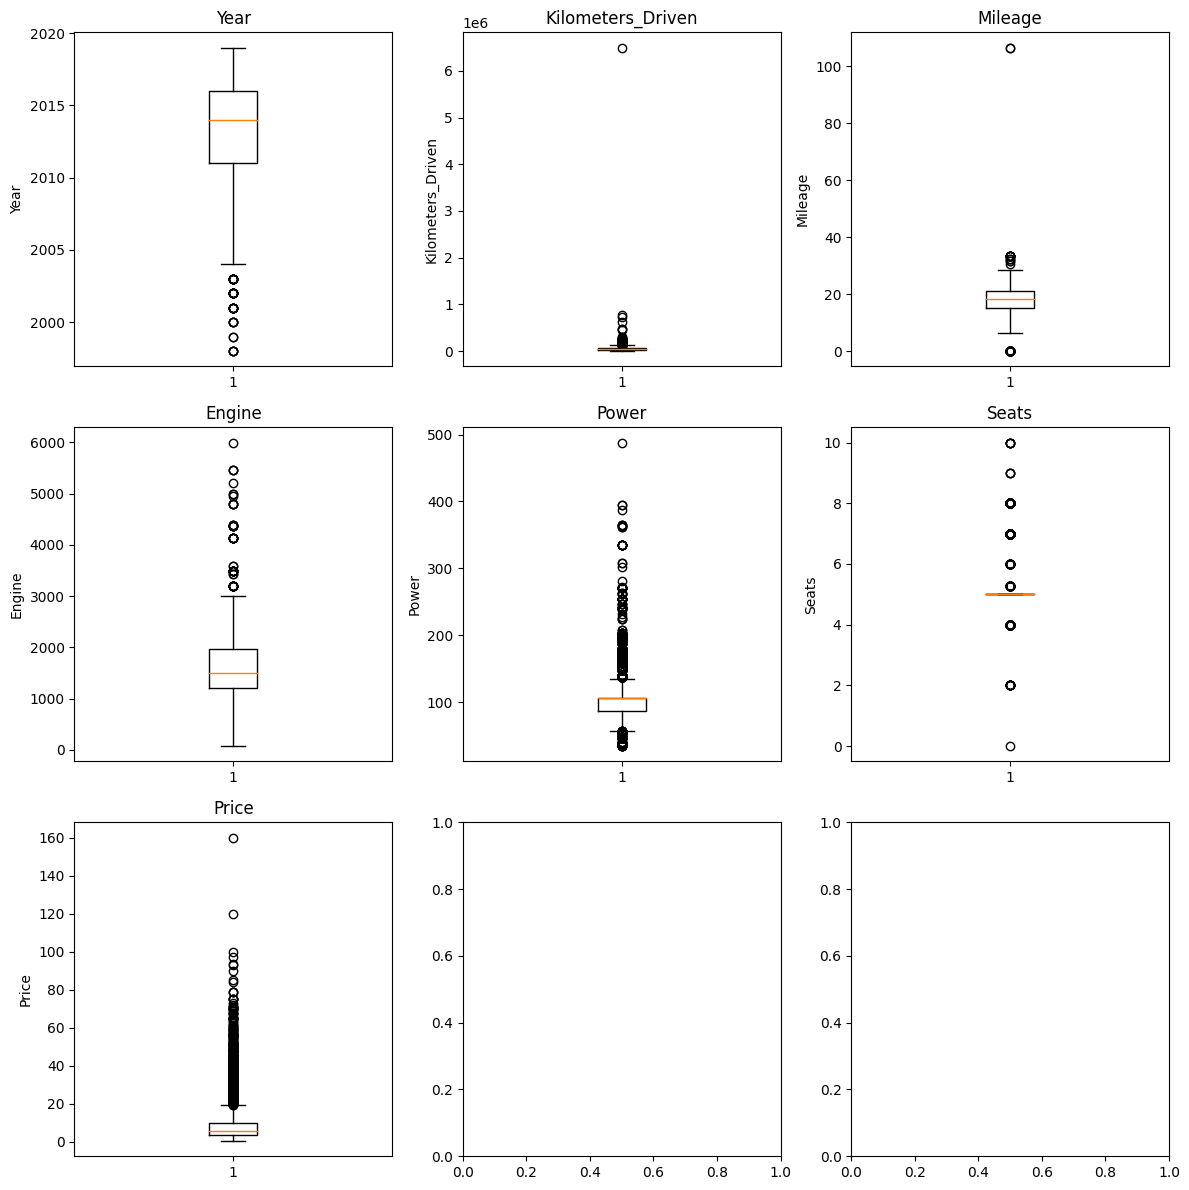

In [228]:
# 수치형 변수들의 box plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    if i < len(numerical_data.columns):
        column = numerical_data.columns[i]
        ax.boxplot(data[column])
        ax.set_title(f'{column}')
        ax.set_ylabel(column)

plt.tight_layout()
plt.show()

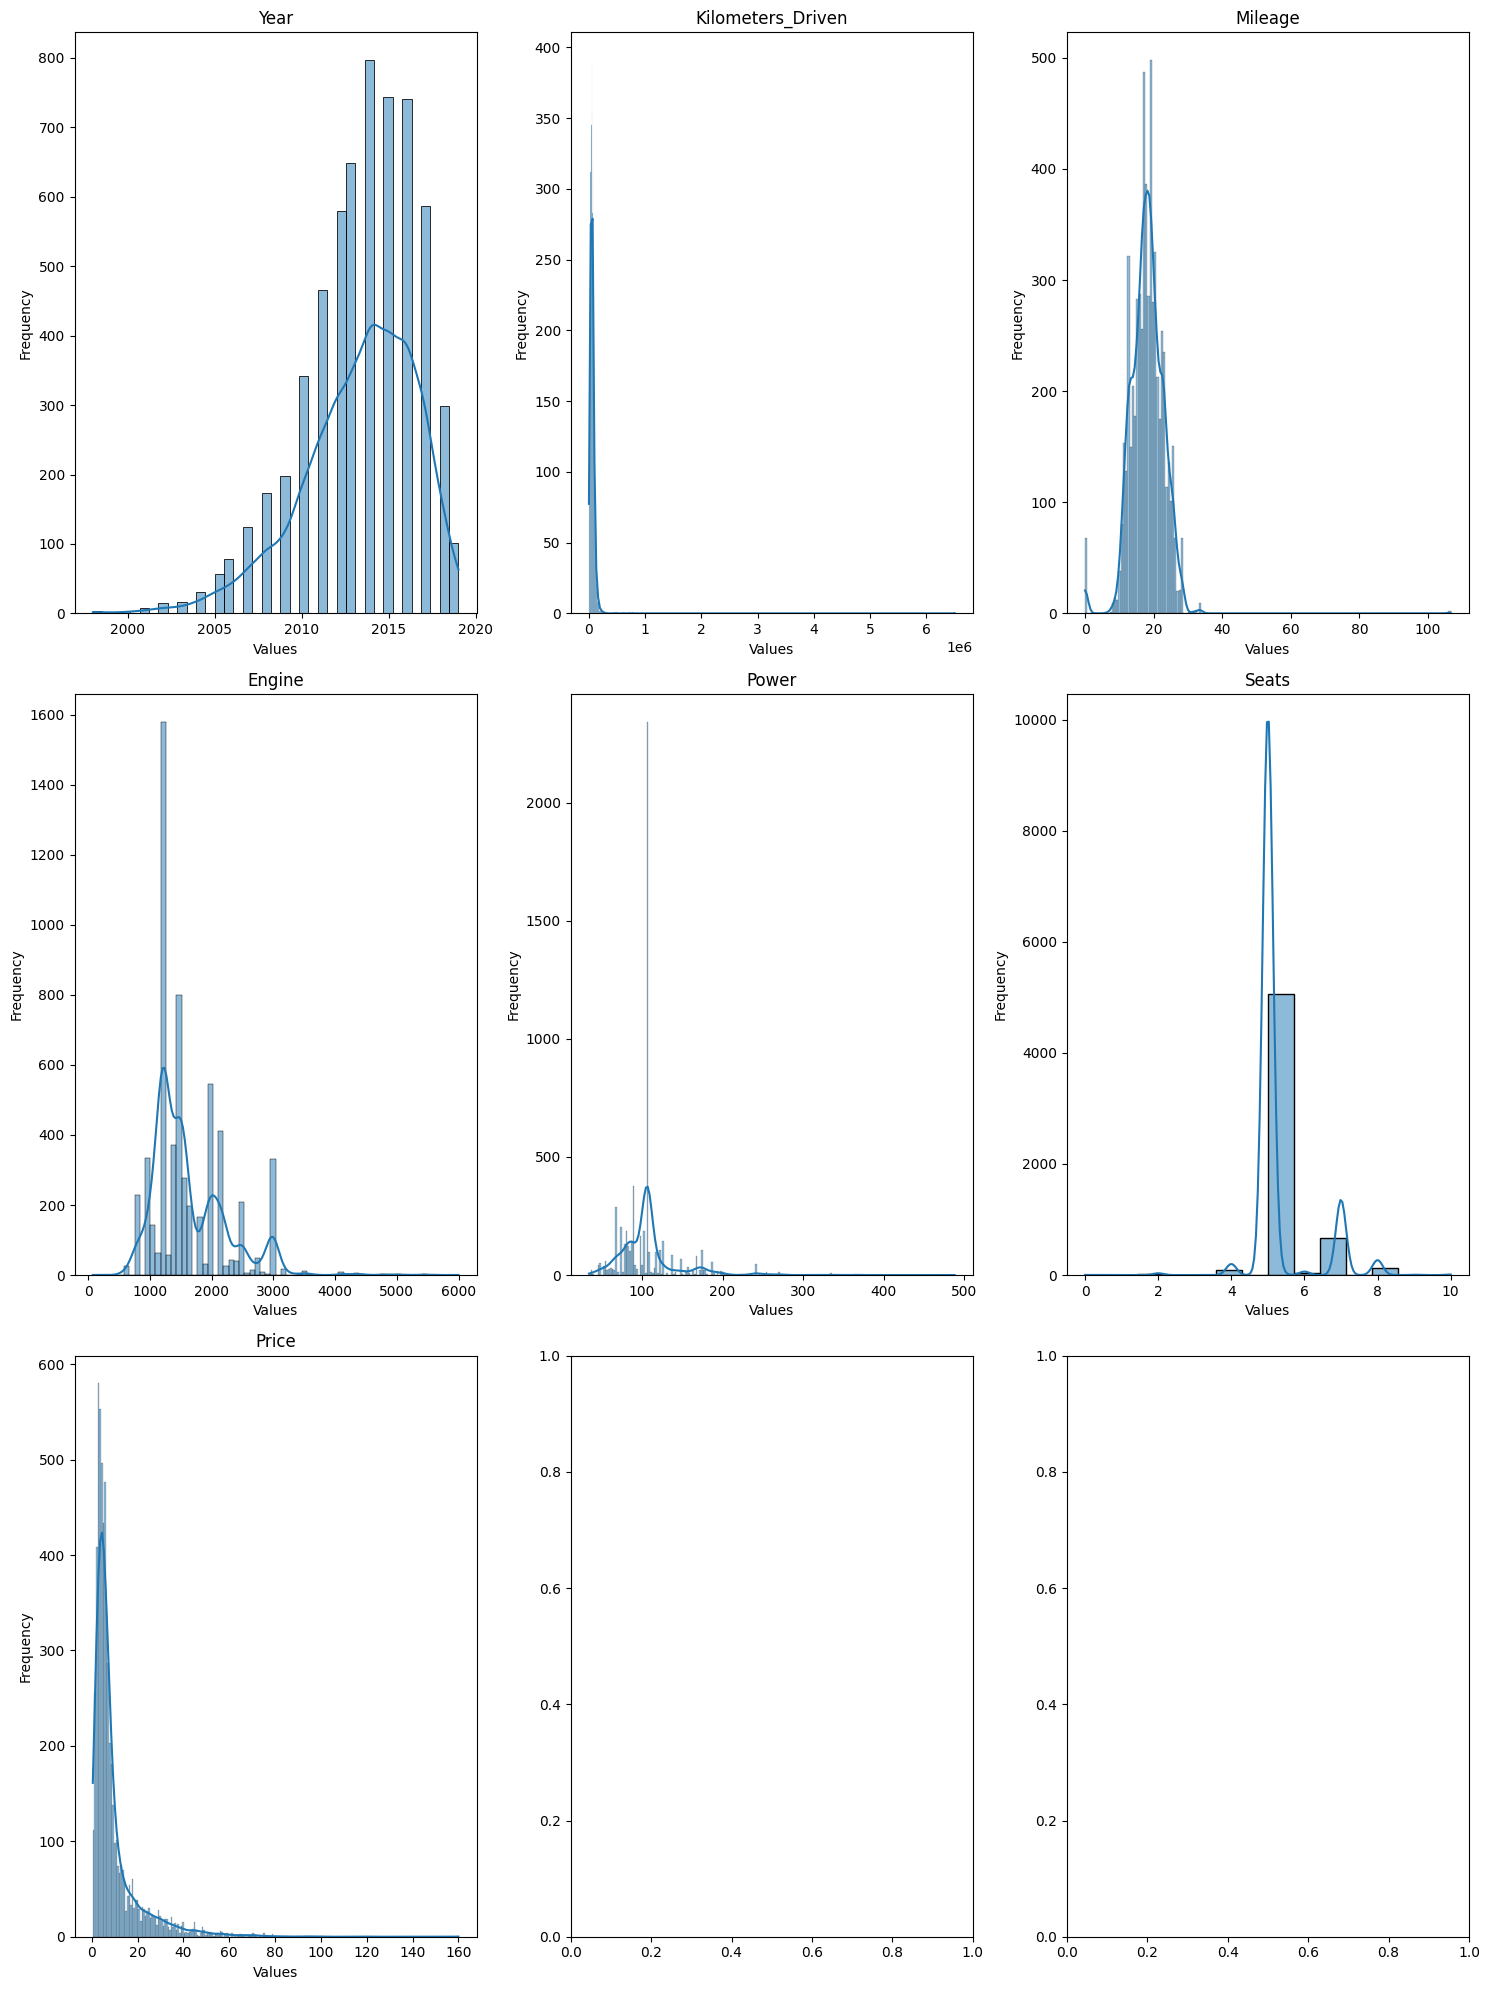

In [229]:
# 분포 플롯 출력 - 전체적으로 고르지 않음. 상황에 맞는 변수 변환 혹은 이상치 제거 필요
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))

for i, ax in enumerate(axes.flat):
    if i < len(numerical_data.columns):
        column = numerical_data.columns[i]

        sns.histplot(data[column], ax=ax, kde=True)
        ax.set_title(f'{column}')
        ax.set_xlabel('Values')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [232]:
# 다중공산성 확인(VIF이용-10이상이면 다중공산성 강함)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = numerical_data

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,Year,102.989701
1,Kilometers_Driven,1.442194
2,Mileage,22.692556
3,Engine,28.321713
4,Power,17.075661
5,Seats,58.426916
6,Price,3.452656


In [233]:
# VIF 가장 높은 year 열 제거
X1=numerical_data.drop(['Year'], axis=1, inplace=True)

In [235]:
# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
vif_data

,Feature,VIF
0,Kilometers_Driven,1.441322
1,Mileage,11.227027
2,Engine,27.850848
3,Power,15.322662
4,Seats,33.492277
5,Price,3.441045


In [236]:
# VIF 가장 높은 Seats 제거
X = X.drop(['Seats'], axis=1, inplace=True)

In [240]:
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

vif_data

,Feature,VIF
0,Kilometers_Driven,1.438022
1,Mileage,5.027546
2,Engine,15.524021
3,Power,15.154825
4,Price,2.887665


In [241]:
X = numerical_data.drop(['Engine'], axis=1, inplace=True)

In [243]:
# 다중공산성이 낮게 나타남.(10이하)
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

vif_data

,Feature,VIF
0,Kilometers_Driven,1.389071
1,Mileage,4.859826
2,Power,7.383878
3,Price,2.402078


In [244]:
numerical_data

,Kilometers_Driven,Mileage,Power,Price
0,72000,26.60,58.16000,1.75
1,41000,19.67,126.20000,12.50
2,46000,18.20,88.70000,4.50
3,87000,20.77,88.76000,6.00
4,40670,15.20,140.80000,17.74
...,...,...,...,...
6014,27365,28.40,106.64065,4.75
6015,100000,24.40,106.64065,4.00
6016,55000,14.00,106.64065,2.90
6017,46000,18.90,67.10000,2.65


In [246]:
merged_subset = merged_df.iloc[:, 10:18]

result_df = pd.concat([numerical_data, merged_subset], axis=1)
result_df.head()

,Kilometers_Driven,Mileage,Power,Price,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,58.16,1.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,41000,19.67,126.20,12.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,46000,18.20,88.70,4.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,87000,20.77,88.76,6.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40670,15.20,140.80,17.74,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [275]:
result_df

,Kilometers_Driven,Mileage,Power,Price,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,26.60,58.16000,1.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,41000,19.67,126.20000,12.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,46000,18.20,88.70000,4.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,87000,20.77,88.76000,6.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,40670,15.20,140.80000,17.74,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,27365,28.40,106.64065,4.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6015,100000,24.40,106.64065,4.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6016,55000,14.00,106.64065,2.90,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6017,46000,18.90,67.10000,2.65,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [276]:
y = data.Price

In [277]:
X_train, X_test, y_train, y_test = train_test_split(result_df, y, test_size=0.2, random_state=0)

In [278]:
y_test.shape

(1204,)

In [279]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [280]:
y_pred = model.predict(X_test)

In [281]:
mean_squared_error(y_test, y_pred)

6.807187231403813e-29

In [283]:
# 1...?
r2_score(y_test, y_pred)

1.0

In [284]:
print(model.coef_)
print(model.intercept_)

[ 9.05377558e-21 -8.81239526e-16 -7.11236625e-17  1.00000000e+00
  2.94166072e-16  2.97378656e-16  2.23996169e-16 -9.88792381e-17
  1.53909275e-16  1.61220863e-16  2.50260966e-16]
1.5987211554602254e-14


In [286]:
X = numerical_data.drop(['Price'], axis=1, inplace=True)
numerical_data

,Kilometers_Driven,Mileage,Power
0,72000,26.60,58.16000
1,41000,19.67,126.20000
2,46000,18.20,88.70000
3,87000,20.77,88.76000
4,40670,15.20,140.80000
...,...,...,...
6014,27365,28.40,106.64065
6015,100000,24.40,106.64065
6016,55000,14.00,106.64065
6017,46000,18.90,67.10000


In [287]:
# 다중공산성이 낮은 수치형 변수들만으로 선형회귀
X_train, X_test, y_train, y_test = train_test_split(numerical_data, y, test_size=0.2, random_state=0)

In [288]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [289]:
y_pred = model.predict(X_test)

In [290]:
mean_squared_error(y_test, y_pred)

82.22944018923191

In [292]:
# 낮은 R^2
r2_score(y_test, y_pred)

0.3140628714953613